In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [24]:
df = pd.read_csv('GDSC2-dataset.csv')
df2 = pd.read_csv('GDSC_DATASET.csv')
df3 = pd.read_csv('Compounds-annotation.csv')
df4 = pd.read_excel('Cell_Lines_Details.xlsx', engine='openpyxl')

c:\Users\allan\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [25]:
df.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,343,15946310,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.463887,0.930220,0.089052,0.433123
1,GDSC2,343,15946548,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869455,0.614970,0.111351,-1.421100
2,GDSC2,343,15946830,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360586,0.791072,0.142855,-0.599569
3,GDSC2,343,15947087,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.044940,0.592660,0.135539,-1.516647
4,GDSC2,343,15947369,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741991,0.734047,0.128059,-0.807232


In [26]:
df2.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [27]:
df3.head()

,DRUG_ID,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
0,1,MGH,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
1,3,MGH,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
2,5,MGH,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
3,6,MGH,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
4,9,MGH,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation


In [28]:
df4.head()

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


EDA

In [29]:
target = "LN_IC50"

# Basic checks
print("Rows:", len(df))
print("Missing LN_IC50:", df[target].isna().sum())

# Core descriptive stats
display(df[target].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

# Helpful extras
skew = df[target].skew()
kurt = df[target].kurt()  # pandas = excess kurtosis
print(f"Skewness: {skew:.3f}")
print(f"Excess kurtosis: {kurt:.3f}")

Rows: 242036
Missing LN_IC50: 0


count    242036.000000
mean          2.817079
std           2.762229
min          -8.747724
1%           -5.436477
5%           -2.838875
25%           1.508018
50%           3.236731
75%           4.700110
95%           6.295622
99%           8.313351
max          13.820189
Name: LN_IC50, dtype: float64

Skewness: -0.812
Excess kurtosis: 1.090


In [30]:
# Since the TCGA_desc is in it's short form, we will expand those by going to the cell line excel file and matching/replacing them to the TCGA_desc
decode = pd.read_excel('Cell_Lines_Details.xlsx', sheet_name='Decode', engine='openpyxl') # since it has a difficult time reading excel,we use this to make it readable

decode = decode.rename(columns={ "TCGA tissue classification:": "TCGA_DESC", "Unnamed: 1": "TCGA_FULL_NAME" }) # this would create a new df with the columns renamed to TCGA_DESC and TCGA_FULL_NAME
decode = decode[decode["TCGA_DESC"].notna() & (decode["TCGA_DESC"] != "TCGA Label")] 

tcga_map = dict(zip(decode["TCGA_DESC"], decode["TCGA_FULL_NAME"])) # Build a dictionary mapping TCGA code -> full cancer name
df["TCGA_FULL_NAME"] = df["TCGA_DESC"].map(tcga_map).fillna(df["TCGA_DESC"]) # Create a readable label column in your main df

# df[["TCGA_DESC", "TCGA_FULL_NAME"]].drop_duplicates().head(15) # Check the mapping worked 

1) LN_IC50 Distribution Analysis

In [31]:
# Does LN_IC50 differ systematically by cancer type?
grp = "TCGA_FULL_NAME" # tissue of origin

top = df[grp].value_counts().head(15).index
tmp = df[df[grp].isin(top)] # It selects the 25 most frequent TCGA_Desc, Description of the cancer type according to The Cancer Genome Atlas, from the dataset

summary = (tmp.groupby(grp)["LN_IC50"]
           .agg(n="size", median="median", mean="mean", q25=lambda x: x.quantile(.25), q75=lambda x: x.quantile(.75))
           .sort_values("median"))
display(summary)

,n,median,mean,q25,q75
TCGA_FULL_NAME,,,,,
Lymphoid Neoplasm Diffuse Large B-cell Lymphoma,7978,2.104788,1.572369,0.350892,3.466423
Acute lymphoblastic leukemia,6795,2.113292,1.603867,0.407968,3.393540
Neuroblastoma,7469,2.888137,2.409070,1.097580,4.305309
UNCLASSIFIED,45691,2.982515,2.529760,1.249272,4.422210
Head and Neck squamous cell carcinoma,9358,3.147711,2.714900,1.455459,4.611267
Small Cell Lung Cancer,13570,3.280327,2.817591,1.642133,4.652123
Skin Cutaneous Melanoma,12637,3.401405,2.936553,1.770942,4.827102
Esophageal carcinoma,9126,3.447328,3.056967,1.788941,4.884416
Colon adenocarcinoma and Rectum adenocarcinoma,12538,3.484322,3.113643,1.685801,5.034300


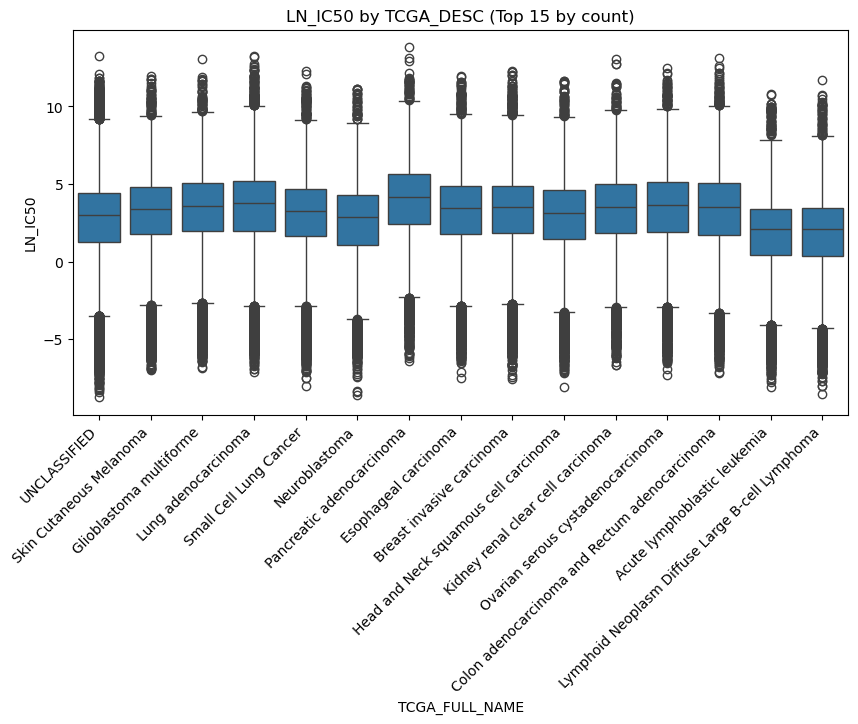

In [32]:
# Boxplot representation of the distribution of LN_IC50
plt.figure(figsize=(10,5))
sns.boxplot(data=tmp, x=grp, y="LN_IC50")
plt.xticks(rotation=45, ha="right")
plt.title("LN_IC50 by TCGA_DESC (Top 15 by count)")
plt.show()

,n,median
PATHWAY_NAME,,
Protein stability and degradation,7087,0.393448
Cell cycle,11620,1.689907
Apoptosis regulation,10828,2.202740
DNA replication,17650,2.571449
PI3K/MTOR signaling,22724,2.730287
RTK signaling,10573,2.802064
ERK MAPK signaling,13350,3.135134
Unclassified,24979,3.179460
Chromatin histone acetylation,8162,3.359223


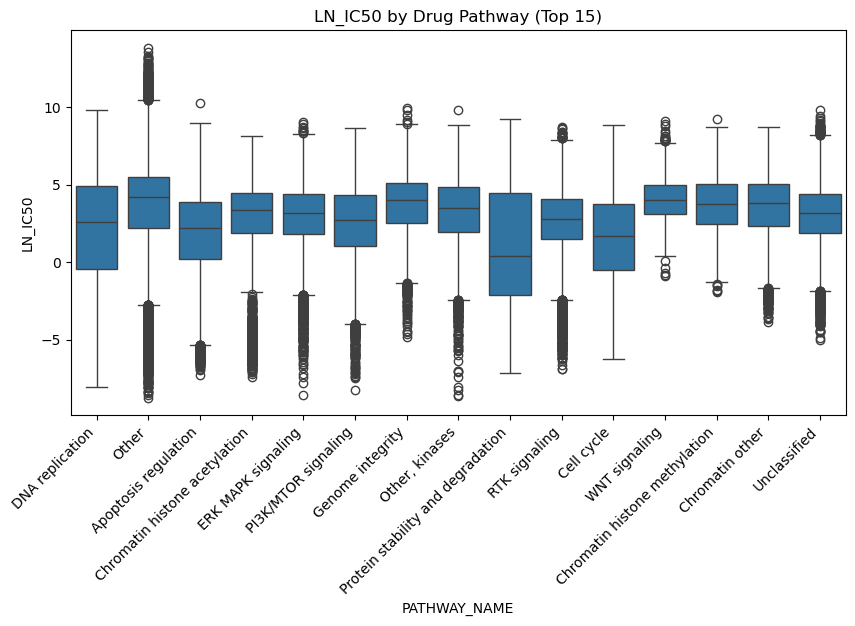

In [33]:
# Now by checking the drug mechanism
drug_grp = "PATHWAY_NAME"   # or TARGET_PATHWAY depending which column you prefer
top = df[drug_grp].value_counts().head(15).index
tmp = df[df[drug_grp].isin(top)]

display(tmp.groupby(drug_grp)["LN_IC50"].agg(n="size", median="median").sort_values("median"))


plt.figure(figsize=(10,5))
sns.boxplot(data=tmp, x=drug_grp, y="LN_IC50")
plt.xticks(rotation=45, ha="right")
plt.title("LN_IC50 by Drug Pathway (Top 15)")
plt.show()

Index(['UNCLASSIFIED', 'LUAD', 'SCLC', 'BRCA', 'SKCM'], dtype='object', name='TCGA_DESC')
Index(['Unclassified', 'PI3K/MTOR signaling', 'Other', 'DNA replication',
       'Other, kinases', 'ERK MAPK signaling', 'Genome integrity',
       'Cell cycle'],
      dtype='object', name='PATHWAY_NAME')


PATHWAY_NAME,Cell cycle,DNA replication,ERK MAPK signaling,Genome integrity,Other,"Other, kinases",PI3K/MTOR signaling,Unclassified
TCGA_DESC,,,,,,,,
BRCA,2.421273,3.719140,3.947040,4.337627,4.539908,3.948095,2.328387,3.206612
LUAD,2.501193,3.249855,3.326724,4.566222,4.926004,3.847238,3.114726,3.722866
SCLC,2.020053,2.485683,3.960510,3.820380,4.118950,3.603247,2.927999,3.055864
SKCM,2.327575,2.906549,0.802080,4.369868,4.403145,3.798493,2.924096,3.340369
UNCLASSIFIED,1.294951,2.060004,3.293607,3.577987,3.915720,3.123280,2.540436,2.961002


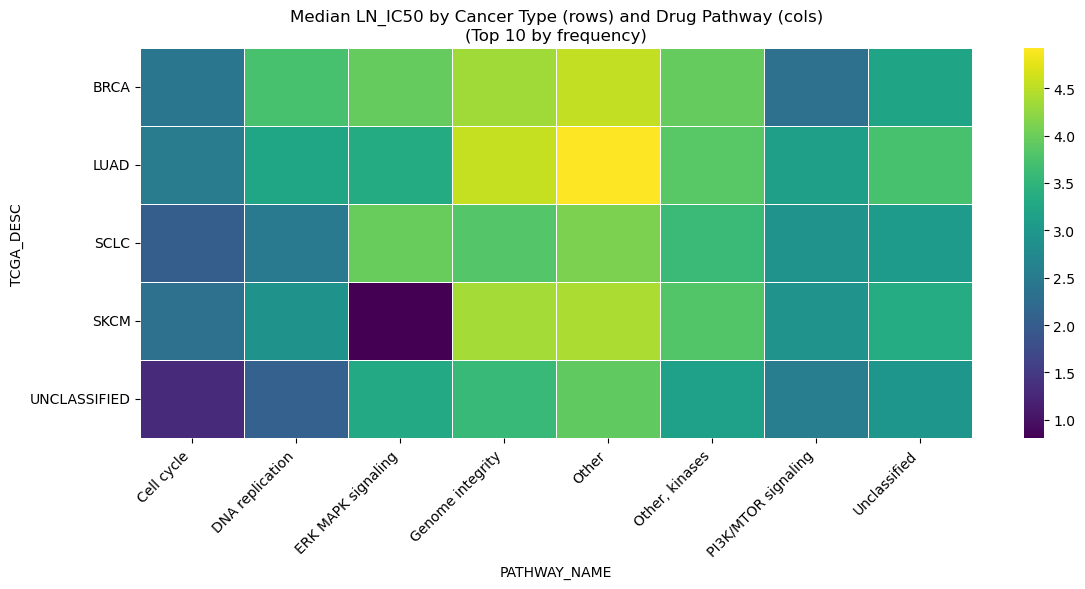

In [34]:
# choosing columns and assigning variables, so we dont have repeat the column name again and again
cancer_col = "TCGA_DESC"        
drug_col   = "PATHWAY_NAME"     
target_col = "LN_IC50"

# Choose the most frequent TCGA and Pathway
top_cancers = df[cancer_col].value_counts().head(5).index
top_drugs   = df[drug_col].value_counts().head(8).index
print(top_cancers)
print(top_drugs)

tmp = df[df[cancer_col].isin(top_cancers) & df[drug_col].isin(top_drugs)].copy()

# Shows the median LN_IC50 for each combination of cancer type and drug pathway
heat = tmp.pivot_table( index=cancer_col, columns=drug_col,
    values=target_col, aggfunc="median")
display(heat)


# heatmap plot 
plt.figure(figsize=(12,6))
sns.heatmap(heat, annot=False, cmap="viridis", linewidths=0.5)
plt.title("Median LN_IC50 by Cancer Type (rows) and Drug Pathway (cols)\n(Top 10 by frequency)")
plt.xlabel(drug_col)
plt.ylabel(cancer_col)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


LN_IC50 shows a wide range with most observations concentrated around the mid-percentiles, but with heavy tails. The distribution is moderately negatively skewed and kurtosis, indicating that extreme sensitivity/resistance values occur more frequently than expected under normality.

2) Missing Values Analysis

In [35]:
# Missing values
def missing_summary(data, name="df"): # Checks for missing values in the dataset and summarizes them by count and percentage
    miss_cnt = data.isna().sum()
    miss_pct = (miss_cnt / len(data) * 100).round(2)
    output = (pd.DataFrame({"missing_count": miss_cnt, "missing_pct": miss_pct})
             .query("missing_count > 0")
             .sort_values(["missing_pct","missing_count"], ascending=False))
    print(f"{name}: {len(data)} rows, {data.shape[1]} columns")
    print(f"{name}: columns with ANY missing = {(data.isna().sum()>0).sum()}")
    return output

miss_df = missing_summary(df, "df")
display(miss_df)

df: 242036 rows, 20 columns
df: columns with ANY missing = 3


,missing_count,missing_pct
PUTATIVE_TARGET,27155,11.22
TCGA_DESC,1067,0.44
TCGA_FULL_NAME,1067,0.44


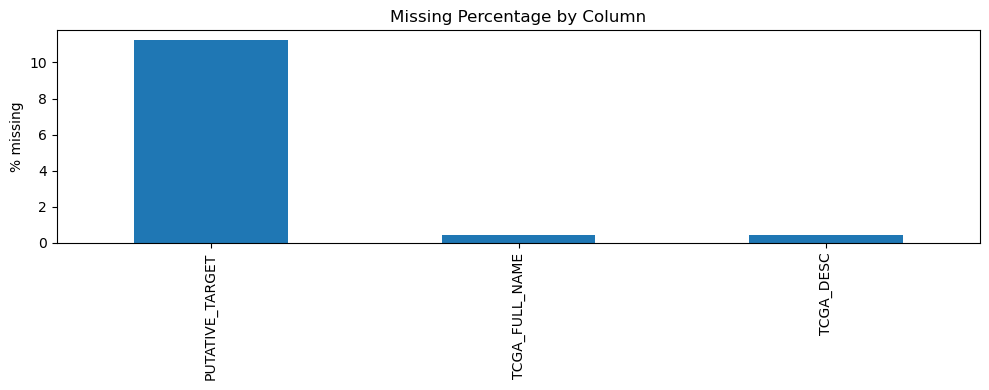

In [36]:
miss_pct_all = (df.isna().mean() * 100).sort_values(ascending=False)
# Bar char
plt.figure(figsize=(10,4))
miss_pct_all[miss_pct_all > 0].plot(kind="bar")
plt.title("Missing Percentage by Column")
plt.ylabel("% missing")
plt.tight_layout()
plt.show()

Missing values were assessed across all columns to quantify dataset completeness and identify where cleaning/imputation may be required. Overall, the missingness pattern shows whether gaps are concentrated in specific fields versus being broadly scattered, which directly informs whether we drop, impute, or add missingness indicators in preprocessing.

3) Cancer Type Distribution + Average LN_IC50 per Cancer Type

In [37]:
# counts + mean/median LN_IC50 per cancer type
cancer_col = "TCGA_FULL_NAME" if "TCGA_FULL_NAME" in df.columns else "TCGA_DESC"
target_col = "LN_IC50"

summary = (df.groupby(cancer_col)[target_col].agg(n="size", mean="mean", median="median", std="std").sort_values("n", ascending=False))
display(summary.head(20))

,n,mean,median,std
TCGA_FULL_NAME,,,,
UNCLASSIFIED,45691,2.529760,2.982515,2.782520
Lung adenocarcinoma,15653,3.353109,3.768890,2.728579
Small Cell Lung Cancer,13570,2.817591,3.280327,2.649456
Breast invasive carcinoma,13106,3.100825,3.492781,2.649848
Skin Cutaneous Melanoma,12637,2.936553,3.401405,2.661532
Colon adenocarcinoma and Rectum adenocarcinoma,12538,3.113643,3.484322,2.723384
Head and Neck squamous cell carcinoma,9358,2.714900,3.147711,2.682307
Esophageal carcinoma,9126,3.056967,3.447328,2.659296
Glioblastoma multiforme,8384,3.182834,3.591582,2.674428


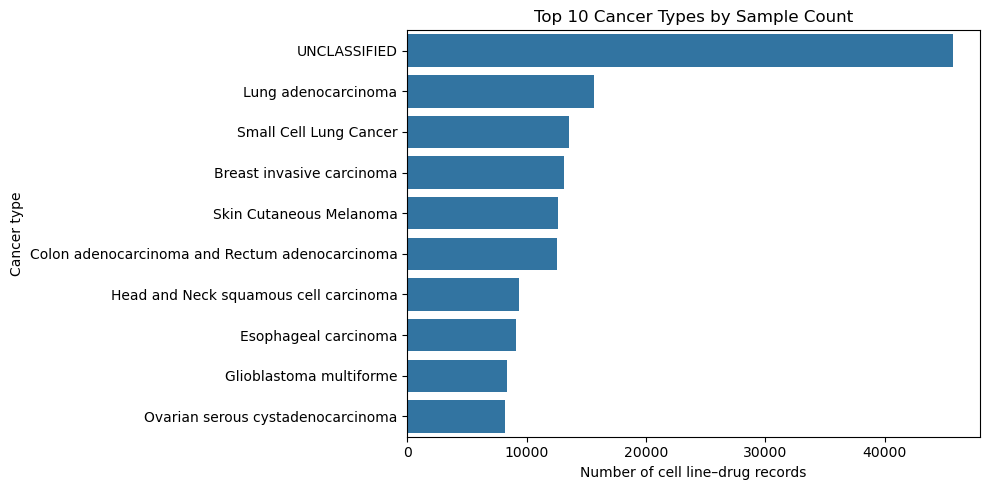

In [38]:
# Cancer type distribution for the top 10
top_n = 10
top_cancers = summary.head(top_n).index
tmp = df[df[cancer_col].isin(top_cancers)].copy()

plt.figure(figsize=(10,5))
sns.countplot(data=tmp, y=cancer_col, order=top_cancers)
plt.title(f"Top {top_n} Cancer Types by Sample Count")
plt.xlabel("Number of cell line–drug records")
plt.ylabel("Cancer type")
plt.tight_layout()
plt.show()

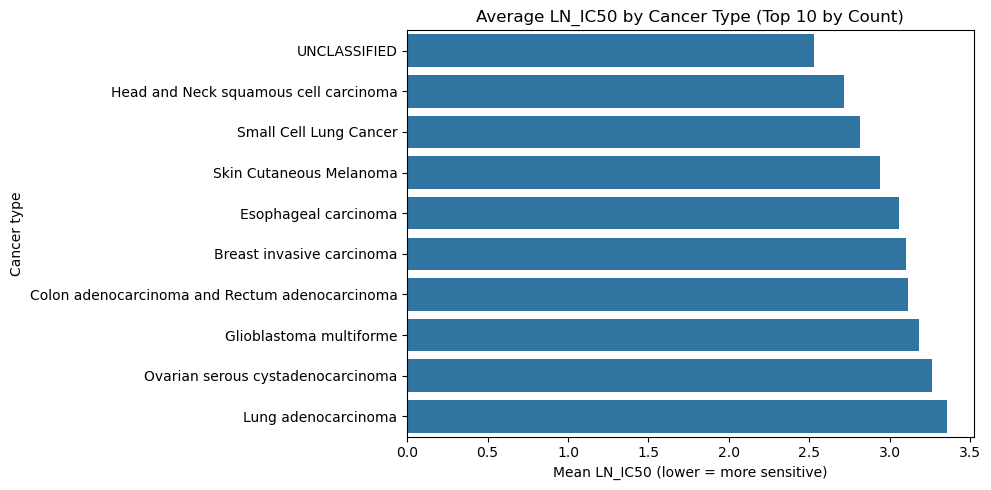

In [39]:
# Average LN_IC50 per cancer type
avg_order = (tmp.groupby(cancer_col)[target_col].mean().sort_values().index)

plt.figure(figsize=(10,5))
sns.barplot(data=tmp, y=cancer_col, x=target_col, order=avg_order, estimator="mean", errorbar=None)
plt.title(f"Average LN_IC50 by Cancer Type (Top {top_n} by Count)")
plt.xlabel("Mean LN_IC50 (lower = more sensitive)")
plt.ylabel("Cancer type")
plt.tight_layout()
plt.show()

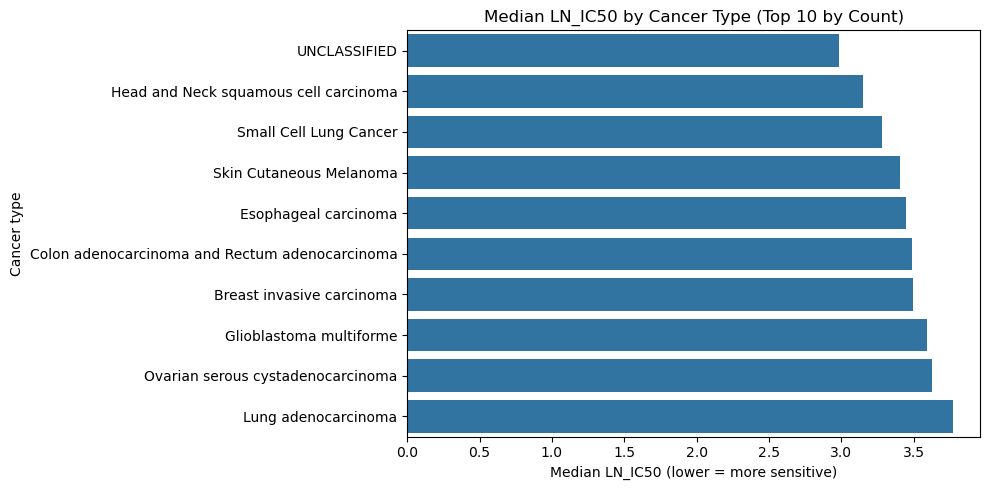

In [40]:
# Median LN_IC50 per cancer type
med_order = (tmp.groupby(cancer_col)[target_col].median().sort_values().index)

plt.figure(figsize=(10,5))
sns.barplot(data=tmp, y=cancer_col, x=target_col, order=med_order, estimator="median", errorbar=None)
plt.title(f"Median LN_IC50 by Cancer Type (Top {top_n} by Count)")
plt.xlabel("Median LN_IC50 (lower = more sensitive)")
plt.ylabel("Cancer type")
plt.tight_layout()
plt.show()

Cancer types are unevenly represented, with a small set of cancers contributing most of the cell line–drug records, which may bias the model toward well-sampled cancers. Mean/median LN_IC50 varies noticeably across cancer types, suggesting cancer-context features carry real signal for drug sensitivity and motivating cancer-stratified evaluation later.

4. Categorical feature cardinality and encoding preview

Looking for- 
No. of unique values (cardinality)
rarest categories (count + %)
median LN_IC50 per category (signal check)
value-count bar chart for high-cardinality columns (e.g., TARGET)

In [41]:
TARGET = "LN_IC50"

cat_cols = [
    "TCGA_DESC",
    "Tissue descriptor 1",
    "Tissue descriptor 2",
    "MSI Status",
    "Growth Properties",
    "Screen Medium",
    "TARGET",
    "TARGET_PATHWAY"
]

# keep only columns that exist (in case naming differs between df/df2)
cat_cols = [c for c in cat_cols if c in df.columns]
print("Categorical columns found:", cat_cols)

Categorical columns found: ['TCGA_DESC']


In [42]:
def cat_eda(data, col, target=TARGET, rare_n=50, rare_pct=0.5, top_k_signal=15, plot_top=25):
    """
    rare_n: categories with count < rare_n are considered rare
    rare_pct: categories with pct < rare_pct are considered rare (percent)
    """
    s = data[col].fillna("MISSING").astype(str)
    n = len(s)

    vc = s.value_counts(dropna=False)
    pct = (vc / n * 100)

    nunique = vc.shape[0]
    rare_mask = (vc < rare_n) | (pct < rare_pct)
    rare_ct = int(rare_mask.sum())
    rare_rows = int(vc[rare_mask].sum())
    rare_rows_pct = rare_rows / n * 100

    print("\n" + "="*80)
    print(f"{col}")
    print(f"Rows: {n:,} | Unique categories: {nunique:,}")
    print(f"Rare categories: {rare_ct:,}  (rare_n<{rare_n} OR rare_pct<{rare_pct}%)")
    print(f"Rows in rare categories: {rare_rows:,} ({rare_rows_pct:.2f}%)")

    # show the rarest categories (bottom 10 by count)
    rarest = pd.DataFrame({
        "count": vc.tail(10),
        "pct": pct.tail(10).round(3)
    })
    display(rarest)

    # median LN_IC50 per category (signal)
    tmp = data.copy()
    tmp[col] = s.values
    med = (tmp.groupby(col)[target]
             .median()
             .sort_values())

    # join counts for context
    med_tbl = pd.DataFrame({
        "median_LN_IC50": med,
        "count": vc,
        "pct": pct
    }).sort_values("median_LN_IC50")

    display(med_tbl.head(top_k_signal))   # most sensitive (lowest median)
    display(med_tbl.tail(top_k_signal))   # most resistant (highest median)

    # value counts bar chart for high-cardinality columns
    if nunique >= 20:  # you can tune this threshold
        top_vals = vc.head(plot_top)
        plt.figure(figsize=(10, 4))
        sns.barplot(x=top_vals.values, y=top_vals.index)
        plt.title(f"Top {plot_top} Value Counts — {col} (cardinality={nunique})")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

    return {
        "column": col,
        "unique": nunique,
        "rare_categories": rare_ct,
        "rare_rows_pct": rare_rows_pct
    }



TCGA_DESC
Rows: 242,036 | Unique categories: 33
Rare categories: 5  (rare_n<50 OR rare_pct<0.5%)
Rows in rare categories: 3,147 (1.30%)


,count,pct
TCGA_DESC,,
CESC,3811,1.575
LGG,3617,1.494
LCML,2611,1.079
UCEC,2512,1.038
PRAD,1676,0.692
MB,1072,0.443
MISSING,1067,0.441
CLL,550,0.227
ACC,279,0.115


,median_LN_IC50,count,pct
TCGA_DESC,,,
CLL,1.727955,550,0.227239
LAML,2.050822,6209,2.565321
DLBC,2.104788,7978,3.296204
ALL,2.113292,6795,2.807434
LCML,2.168504,2611,1.078765
MM,2.472587,4598,1.899717
ACC,2.814354,279,0.115272
NB,2.888137,7469,3.085905
MB,2.924876,1072,0.442909


,median_LN_IC50,count,pct
TCGA_DESC,,,
BLCA,3.575403,4724,1.951776
LUSC,3.586884,3863,1.596044
GBM,3.591582,8384,3.463948
THCA,3.619488,4037,1.667934
OV,3.625499,8166,3.373878
LIHC,3.653661,4164,1.720405
PRAD,3.677676,1676,0.692459
LUAD,3.768890,15653,6.467220
UCEC,3.812976,2512,1.037862


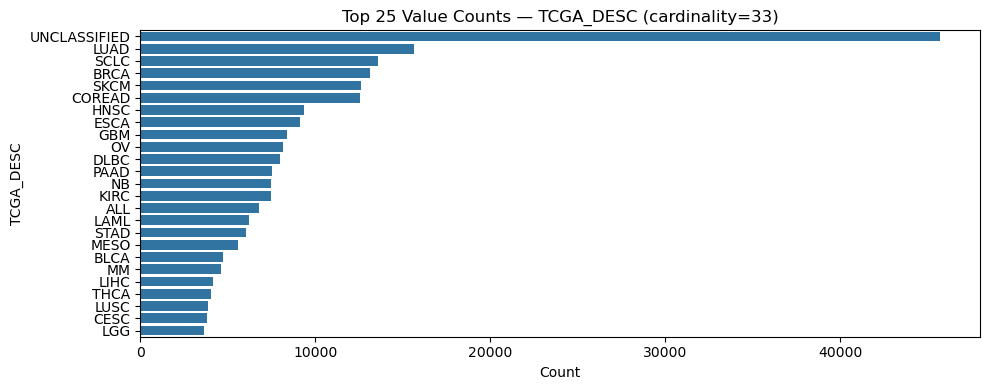

,column,unique,rare_categories,rare_rows_pct
0,TCGA_DESC,33,5,1.30022


In [43]:
# Run EDA for each categorical column
results = []
for c in cat_cols:
    results.append(cat_eda(df, c, target=TARGET, rare_n=50, rare_pct=0.5, top_k_signal=12, plot_top=25))

overview = pd.DataFrame(results).sort_values("unique", ascending=False)
display(overview)

Each categorical feature was examined for the number of unique labels, the presence and proportion of rare categories, and differences in median LN_IC50 across categories. This analysis indicates which categorical variables likely carry meaningful signal and which may require rare-category grouping or alternative encoding to reduce noise and high dimensionality.

5. Within-Group Variance Analysis for the 5 Missing Features

Within-Group Variance Analysis (df2): do LN_IC50 values differ across categories
*within the same TCGA_DESC* for the 5 “unused” features?

In [47]:
TARGET = "LN_IC50"
CANCER = "TCGA_DESC"

features = [
    "Growth Properties",
    "MSI Status",                # Microsatellite instability status
    "Screen Medium",
    "Tissue descriptor 1",
    "Tissue descriptor 2",
]

# Keep only columns that exist (in case names differ slightly)
features = [f for f in features if f in df2.columns]
print("Features found in df2:", features)

def within_group_signal_table(
    data: pd.DataFrame,
    feature: str,
    cancer_col: str = CANCER,
    target_col: str = TARGET,
    min_total: int = 2000,     # minimum rows per cancer type to analyze
    min_per_cat: int = 50,     # minimum rows per category within a cancer type
):
    """
    For each cancer type (TCGA_DESC), tests whether LN_IC50 differs across categories of 'feature'.
    Returns a table per (TCGA_DESC, feature) with:
      - k categories (after filtering)
      - N rows used
      - eta^2 (effect size, ANOVA-based)
      - p-value (one-way ANOVA)
      - median_range (max median - min median across categories)
    """
    df = data[[cancer_col, feature, target_col]].dropna().copy()
    df[feature] = df[feature].astype(str)

    out_rows = []

    for tcga, g in df.groupby(cancer_col):
        if len(g) < min_total:
            continue

        # enforce minimum per category
        vc = g[feature].value_counts()
        keep_cats = vc[vc >= min_per_cat].index
        gg = g[g[feature].isin(keep_cats)]

        k = gg[feature].nunique()
        if k < 2:
            continue

        # build groups for ANOVA
        groups = [vals[target_col].values for _, vals in gg.groupby(feature)]
        # one-way ANOVA
        f_stat, p_val = stats.f_oneway(*groups)

        # effect size eta^2 = SS_between / SS_total
        overall_mean = gg[target_col].mean()
        ss_total = ((gg[target_col] - overall_mean) ** 2).sum()
        ss_between = 0.0
        for cat, sub in gg.groupby(feature):
            ss_between += len(sub) * (sub[target_col].mean() - overall_mean) ** 2
        eta2 = (ss_between / ss_total) if ss_total > 0 else np.nan

        # median spread (simple practical magnitude)
        medians = gg.groupby(feature)[target_col].median()
        median_range = float(medians.max() - medians.min())

        out_rows.append({
            "feature": feature,
            "TCGA_DESC": tcga,
            "N_used": int(len(gg)),
            "k_categories": int(k),
            "eta2": float(eta2),
            "p_value": float(p_val),
            "median_range": median_range,
            "lowest_median_cat": str(medians.idxmin()),
            "highest_median_cat": str(medians.idxmax()),
        })

    res = pd.DataFrame(out_rows)
    if res.empty:
        return res

    # Multiple-testing-friendly ordering: larger effect size + larger median_range + smaller p
    res = res.sort_values(["eta2", "median_range", "p_value"], ascending=[False, False, True])
    return res


Features found in df2: ['Growth Properties', 'Screen Medium']


,feature,TCGA_DESC,N_used,k_categories,eta2,p_value,median_range,lowest_median_cat,highest_median_cat
0,Growth Properties,UNCLASSIFIED,44258,3,0.027032,4.480810e-264,0.885785,Suspension,Adherent
1,Growth Properties,STAD,5069,3,0.022960,2.808614e-26,2.867869,Suspension,Semi-Adherent
2,Growth Properties,MM,4598,2,0.014460,2.801435e-16,1.006063,Suspension,Semi-Adherent
3,Growth Properties,THCA,3759,2,0.013467,9.552982e-13,0.935347,Semi-Adherent,Adherent
4,Growth Properties,BRCA,13106,2,0.010869,5.294712e-33,0.621146,Suspension,Adherent
5,Growth Properties,COREAD,12258,3,0.008954,1.158208e-24,1.754439,Suspension,Semi-Adherent
6,Growth Properties,SKCM,12097,3,0.003393,1.187622e-09,1.522698,Semi-Adherent,Suspension
7,Growth Properties,SCLC,13570,3,0.002220,2.839872e-07,0.357338,Semi-Adherent,Adherent
8,Growth Properties,UCEC,2512,2,0.001973,2.598027e-02,0.411440,Suspension,Adherent
9,Growth Properties,LUAD,15483,3,0.001363,2.603766e-05,0.735836,Suspension,Semi-Adherent


,cancers_tested,avg_eta2,median_eta2,max_eta2,avg_median_range,max_median_range,frac_sig_p001
feature,,,,,,,
Growth Properties,14,0.007763,0.002806,0.027032,0.888909,2.867869,0.642857
Screen Medium,26,0.003512,0.002048,0.016288,0.283188,0.884301,0.500000


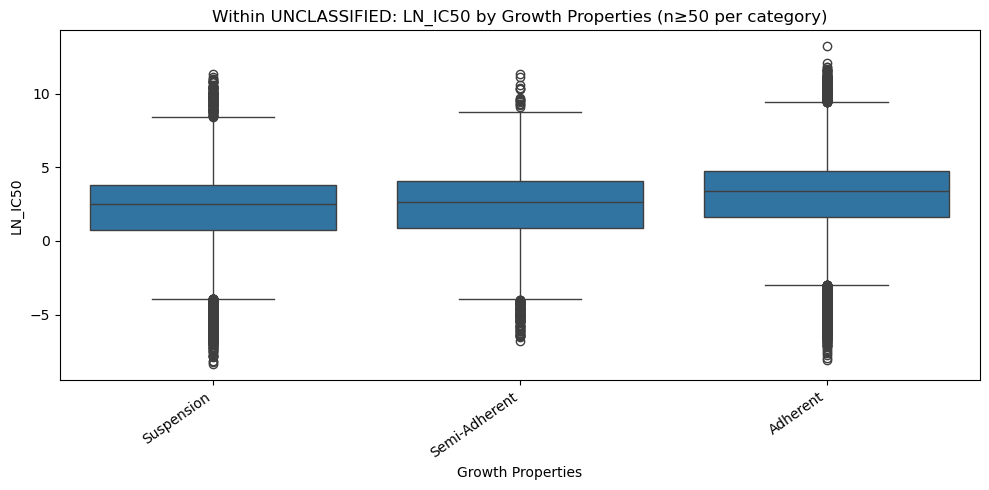

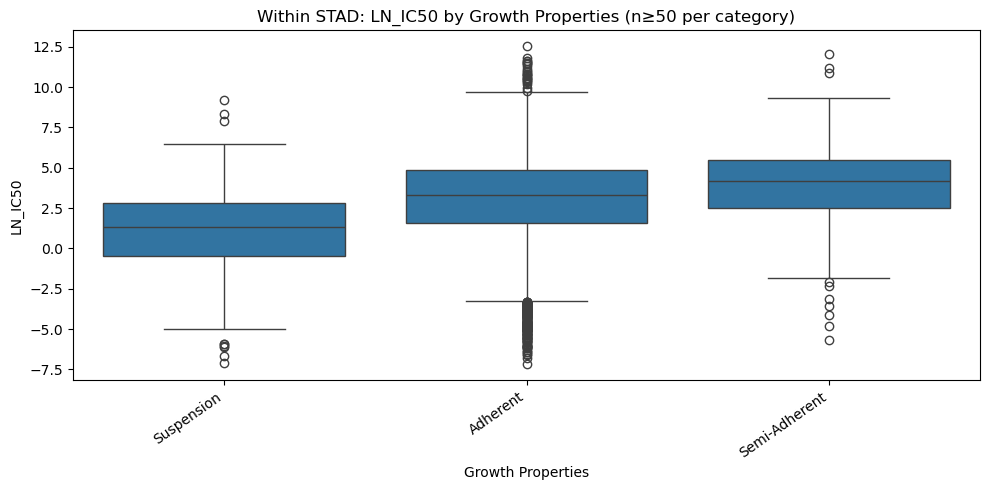

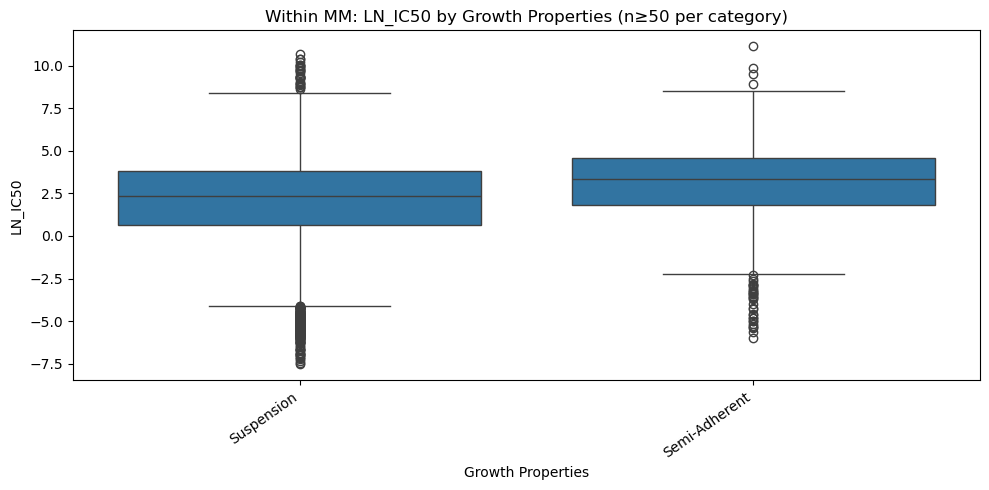

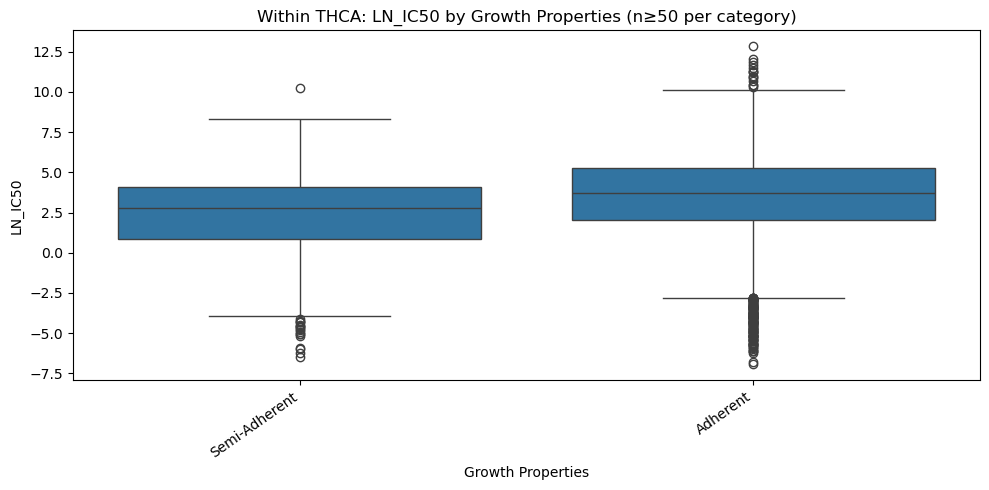

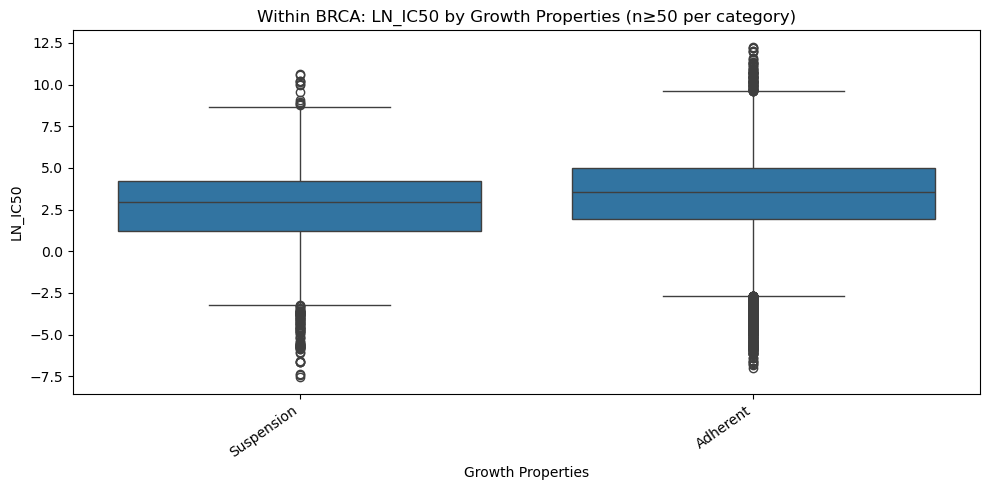

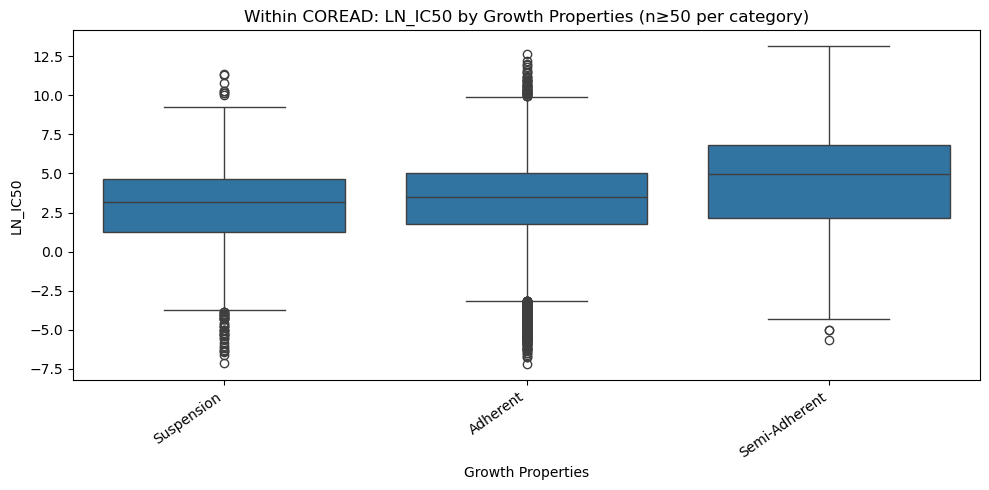

In [48]:
# 1) Run analysis for all 5 features
all_results = []
for feat in features:
    tab = within_group_signal_table(df2, feat, min_total=2000, min_per_cat=50)
    if not tab.empty:
        all_results.append(tab)

results = pd.concat(all_results, ignore_index=True) if all_results else pd.DataFrame()
display(results.head(30))

# 2) Quick per-feature summary: where is within-TCGA signal strongest?
if not results.empty:
    feature_summary = (results.groupby("feature")
                       .agg(
                           cancers_tested=("TCGA_DESC","nunique"),
                           avg_eta2=("eta2","mean"),
                           median_eta2=("eta2","median"),
                           max_eta2=("eta2","max"),
                           avg_median_range=("median_range","mean"),
                           max_median_range=("median_range","max"),
                           frac_sig_p001=("p_value", lambda s: (s < 0.001).mean())
                       )
                       .sort_values(["max_eta2","max_median_range"], ascending=False))
    display(feature_summary)
else:
    print("No within-group comparisons met the thresholds. Consider lowering min_total/min_per_cat.")


# 3) Visualization helper: pick top cancer-type examples and draw boxplots within that TCGA_DESC
def plot_within_tcga_distributions(
    data: pd.DataFrame,
    tcga_desc: str,
    feature: str,
    cancer_col: str = CANCER,
    target_col: str = TARGET,
    min_per_cat: int = 50,
    top_k: int = 8
):
    df = data[[cancer_col, feature, target_col]].dropna().copy()
    df = df[df[cancer_col] == tcga_desc].copy()
    df[feature] = df[feature].astype(str)

    vc = df[feature].value_counts()
    keep = vc[vc >= min_per_cat].head(top_k).index  # show top_k most frequent categories (after min_per_cat)
    df = df[df[feature].isin(keep)]

    if df[feature].nunique() < 2:
        print(f"Not enough categories for {tcga_desc} × {feature} after filtering.")
        return

    order = df.groupby(feature)[target_col].median().sort_values().index

    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=feature, y=target_col, order=order)
    plt.xticks(rotation=35, ha="right")
    plt.title(f"Within {tcga_desc}: LN_IC50 by {feature} (n≥{min_per_cat} per category)")
    plt.xlabel(feature)
    plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()


# 4) Auto-plot the strongest within-group signals (top 6 rows overall)
if not results.empty:
    top_pairs = results.head(6)[["TCGA_DESC","feature"]].values.tolist()
    for tcga_desc, feat in top_pairs:
        plot_within_tcga_distributions(df2, tcga_desc, feat, min_per_cat=50, top_k=8)

Within each TCGA cancer type, LN_IC50 distributions were compared across categories of five additional clinical/experimental features (Growth Properties, MSI Status, Screen Medium, and Tissue descriptors 1–2) to test whether these variables explain response differences beyond cancer type alone. Features that showed clear within-cancer shifts in median LN_IC50 and meaningful effect sizes were flagged as signal-bearing additions that can reduce “flat” predictions by giving the model extra within-group information.